In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [19]:
url='https://en.wikipedia.org/wiki/Wikipedia:Fundraising_statistics'
tables=pd.read_html(url)

In [20]:
type(tables)

list

In [21]:
len(tables)

1

In [22]:
tables[0].head()

,Year,Source,Revenue,Expenses,Asset rise,Total assets
0,2021/22,PDF,"$ 154,686,521","$ 145,970,915","$ 8,173,996","$ 239,351,532"
1,2020/21,PDF,"$ 162,886,686","$ 111,839,819","$ 50,861,811","$ 231,177,536"
2,2019/20,PDF,"$ 129,234,327","$ 112,489,397","$ 14,674,300","$ 180,315,725"
3,2018/19,PDF,"$ 120,067,266","$ 91,414,010","$ 30,691,855","$ 165,641,425"
4,2017/18,PDF,"$ 104,505,783","$ 81,442,265","$ 21,619,373","$ 134,949,570"


In [23]:
fundraising=tables[0]

In [24]:
fundraising

,Year,Source,Revenue,Expenses,Asset rise,Total assets
0,2021/22,PDF,"$ 154,686,521","$ 145,970,915","$ 8,173,996","$ 239,351,532"
1,2020/21,PDF,"$ 162,886,686","$ 111,839,819","$ 50,861,811","$ 231,177,536"
2,2019/20,PDF,"$ 129,234,327","$ 112,489,397","$ 14,674,300","$ 180,315,725"
3,2018/19,PDF,"$ 120,067,266","$ 91,414,010","$ 30,691,855","$ 165,641,425"
4,2017/18,PDF,"$ 104,505,783","$ 81,442,265","$ 21,619,373","$ 134,949,570"
5,2016/17,PDF,"$ 91,242,418","$ 69,136,758","$ 21,547,402","$ 113,330,197"
6,2015/16,PDF,"$ 81,862,724","$ 65,947,465","$ 13,962,497","$ 91,782,795"
7,2014/15,PDF,"$ 75,797,223","$ 52,596,782","$ 24,345,277","$ 77,820,298"
8,2013/14,PDF,"$ 52,465,287","$ 45,900,745","$ 8,285,897","$ 53,475,021"
9,2012/13,PDF,"$ 48,635,408","$ 35,704,796","$ 10,260,066","$ 45,189,124"


In [25]:
type(fundraising)

pandas.core.frame.DataFrame

In [26]:
fundraising.dtypes

Year            object
Source          object
Revenue         object
Expenses        object
Asset rise      object
Total assets    object
dtype: object

In [27]:
fundraising['Rev']=fundraising['Revenue'].str[2:]
fundraising['Rev']=fundraising['Rev'].str.replace(',','')

In [28]:
fundraising.head()

,Year,Source,Revenue,Expenses,Asset rise,Total assets,Rev
0,2021/22,PDF,"$ 154,686,521","$ 145,970,915","$ 8,173,996","$ 239,351,532",154686521
1,2020/21,PDF,"$ 162,886,686","$ 111,839,819","$ 50,861,811","$ 231,177,536",162886686
2,2019/20,PDF,"$ 129,234,327","$ 112,489,397","$ 14,674,300","$ 180,315,725",129234327
3,2018/19,PDF,"$ 120,067,266","$ 91,414,010","$ 30,691,855","$ 165,641,425",120067266
4,2017/18,PDF,"$ 104,505,783","$ 81,442,265","$ 21,619,373","$ 134,949,570",104505783


In [29]:
fundraising['Rev']=pd.to_numeric(fundraising['Rev'])#convert field to int

In [30]:
fundraising.dtypes#Rev has changed from object to dtype int

Year            object
Source          object
Revenue         object
Expenses        object
Asset rise      object
Total assets    object
Rev              int64
dtype: object

In [31]:
#we will convert all relevant fields to dtype int
fundraising['Exp']=fundraising['Expenses'].str[2:]
fundraising['Exp']=fundraising['Exp'].str.replace(',','')
fundraising['Exp']=pd.to_numeric(fundraising['Exp'])

In [32]:
fundraising.head()

,Year,Source,Revenue,Expenses,Asset rise,Total assets,Rev,Exp
0,2021/22,PDF,"$ 154,686,521","$ 145,970,915","$ 8,173,996","$ 239,351,532",154686521,145970915
1,2020/21,PDF,"$ 162,886,686","$ 111,839,819","$ 50,861,811","$ 231,177,536",162886686,111839819
2,2019/20,PDF,"$ 129,234,327","$ 112,489,397","$ 14,674,300","$ 180,315,725",129234327,112489397
3,2018/19,PDF,"$ 120,067,266","$ 91,414,010","$ 30,691,855","$ 165,641,425",120067266,91414010
4,2017/18,PDF,"$ 104,505,783","$ 81,442,265","$ 21,619,373","$ 134,949,570",104505783,81442265


In [33]:
fundraising['Assets_rise']=fundraising['Asset rise'].str[2:]
fundraising['Assets_rise']=fundraising['Assets_rise'].str.replace(',','')
fundraising['Assets_rise']=fundraising['Assets_rise'].astype('int')

In [34]:
fundraising['Total_assets']=fundraising['Total assets'].str[2:]
fundraising['Total_assets']=fundraising['Total_assets'].str.replace(',','')
fundraising['Total_assets']=fundraising['Total_assets'].astype('int')

In [35]:
fundraising.head()

,Year,Source,Revenue,Expenses,Asset rise,Total assets,Rev,Exp,Assets_rise,Total_assets
0,2021/22,PDF,"$ 154,686,521","$ 145,970,915","$ 8,173,996","$ 239,351,532",154686521,145970915,8173996,239351532
1,2020/21,PDF,"$ 162,886,686","$ 111,839,819","$ 50,861,811","$ 231,177,536",162886686,111839819,50861811,231177536
2,2019/20,PDF,"$ 129,234,327","$ 112,489,397","$ 14,674,300","$ 180,315,725",129234327,112489397,14674300,180315725
3,2018/19,PDF,"$ 120,067,266","$ 91,414,010","$ 30,691,855","$ 165,641,425",120067266,91414010,30691855,165641425
4,2017/18,PDF,"$ 104,505,783","$ 81,442,265","$ 21,619,373","$ 134,949,570",104505783,81442265,21619373,134949570


In [36]:
#drop all fields that are in dtype object
fundraising.drop('Revenue',axis=1,inplace=True)
fundraising.drop('Expenses',axis=1,inplace=True)
fundraising.drop('Asset rise',axis=1,inplace=True)
fundraising.drop('Total assets',axis=1,inplace=True)
fundraising.drop('Source',axis=1,inplace=True)

In [37]:
fundraising['Profits']=fundraising['Rev']-fundraising['Exp']

In [38]:
fundraising.head()

,Year,Rev,Exp,Assets_rise,Total_assets,Profits
0,2021/22,154686521,145970915,8173996,239351532,8715606
1,2020/21,162886686,111839819,50861811,231177536,51046867
2,2019/20,129234327,112489397,14674300,180315725,16744930
3,2018/19,120067266,91414010,30691855,165641425,28653256
4,2017/18,104505783,81442265,21619373,134949570,23063518


We will introduce a new field ROI to show the Return on investments after utilizing the funds.
Figures below 0 denote a loss.

In [39]:
fundraising['ROI']=round(fundraising['Rev']/fundraising['Exp'],2)

In [40]:
fundraising.head()

,Year,Rev,Exp,Assets_rise,Total_assets,Profits,ROI
0,2021/22,154686521,145970915,8173996,239351532,8715606,1.06
1,2020/21,162886686,111839819,50861811,231177536,51046867,1.46
2,2019/20,129234327,112489397,14674300,180315725,16744930,1.15
3,2018/19,120067266,91414010,30691855,165641425,28653256,1.31
4,2017/18,104505783,81442265,21619373,134949570,23063518,1.28


In [41]:
fundraising['ROI']<0

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
Name: ROI, dtype: bool

From the insight above we can say Wikipedia has never posted a loss.

In [25]:
fundraising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Year          19 non-null     object 
 1   Rev           19 non-null     int64  
 2   Exp           19 non-null     int64  
 3   Assets_rise   19 non-null     int32  
 4   Total_assets  19 non-null     int32  
 5   Profits       19 non-null     int64  
 6   ROI           19 non-null     float64
dtypes: float64(1), int32(2), int64(3), object(1)
memory usage: 1.0+ KB


Let's see how the profits and asset rise have performed year to date on a plot.

From the plot below,we see their profits from investments have increased since 2003/04. But there was a very sharp decrease in 2021/22 from the previous year.
Somehow, the year 2020/21 is an outlier due to some business factors.

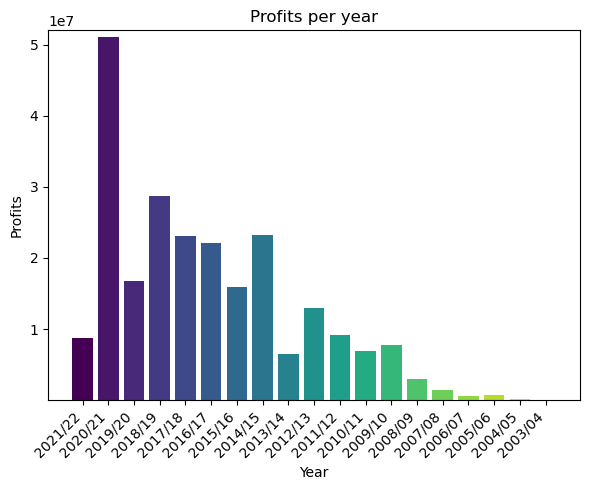

In [42]:
plt.figure(figsize=(6, 5))
years=fundraising['Year'].unique()
profits=fundraising['Profits'].unique()
plt.bar(years, profits, color=plt.cm.viridis(np.linspace(0, 1, len(years))))
plt.xlabel('Year')
plt.ylabel('Profits')
plt.title('Profits per year')
plt.xticks(rotation=45, ha='right')
plt.ylim(55000,52000000)
plt.tight_layout()
plt.show()

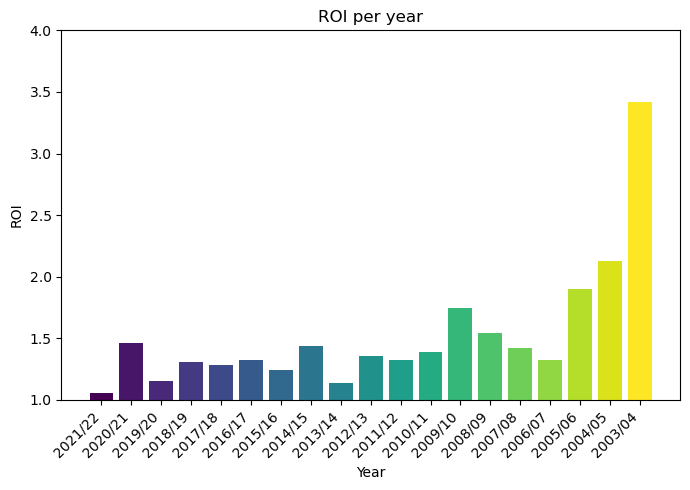

In [43]:
plt.figure(figsize=(7, 5))
years=fundraising['Year']
ROI=fundraising['ROI']
bars=plt.bar(years, ROI, color=plt.cm.viridis(np.linspace(0, 1, len(years))))
plt.xlabel('Year')
plt.ylabel('ROI')
plt.title('ROI per year')
plt.xticks(rotation=45, ha='right')
plt.ylim(1.0,4.0)
plt.tight_layout()
plt.show()

The ROI is a measure of return from what you sowed, Wikipedia's ROI has been decreasing since 2004/2005 and the year 2021/22 noted a sharp decrease from the previous year as well.
Neverthless, they have never failed to make a return on their investments.

Let's see if wikipedia have been investing their funds wisely by plotting a graph showing growth of total assets to date.

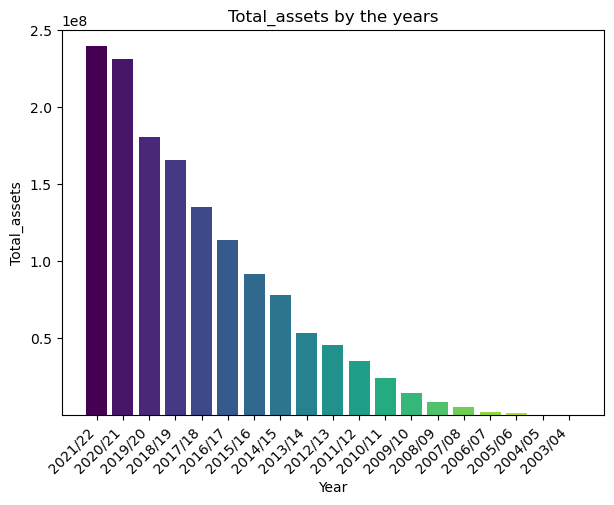

In [44]:
plt.figure(figsize=(7, 5))
years=fundraising['Year']
Total_assets=fundraising['Total_assets']
bars=plt.bar(years, Total_assets, color=plt.cm.viridis(np.linspace(0, 1, len(years))))
plt.xlabel('Year')
plt.ylabel('Total_assets')
plt.title('Total_assets by the years')
plt.xticks(rotation=45, ha='right')
plt.ylim(57000,250000000)
plt.show()

Their total assets have been on a consistent growth since year one. We could say, Wikipedia does invest wisely the funds it raises.

Let's analyse several correlations to see what affects what

In [45]:
fundraising['Total_assets'].corr(fundraising['Profits'])

0.7590173540118825

We will plot this correlation to understand clearly how close the two fields are.

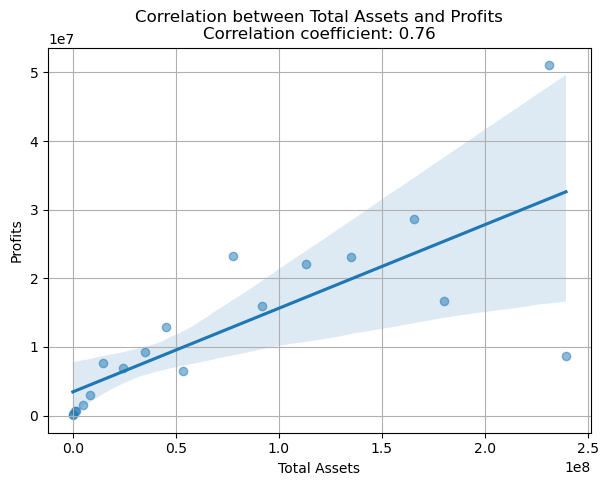

In [46]:
correlation = fundraising['Total_assets'].corr(fundraising['Profits'])
plt.figure(figsize=(7, 5))
sns.regplot(x='Total_assets', y='Profits', data=fundraising, scatter_kws={'alpha':0.5})
plt.title(f'Correlation between Total Assets and Profits\nCorrelation coefficient: {correlation:.2f}')
plt.xlabel('Total Assets')
plt.ylabel('Profits')
plt.grid(True)
plt.show()

In [47]:
fundraising['ROI'].corr(fundraising['Profits'])

-0.3388295389251573

There is a **negative correlation** between profits and ROI, We can't say as profits go up so does the ROI.

Neverthless,there's a **beautiful positive correlation** between Total_assets owned and profits gained. A 0.75 correlation says that when one goes up, surely the other will.

This should encourage Wikipedia to invest more in owning assets.

Let's introduce fields 'Profit Margin' indicating the proportion of revenue that is profit and 'Expense_ratio' which shows what proportion of the revenues goes to expenses.
These insights will help wikipedia decide whether to go on a cost-cutting drive or a profits re-ploughing drive.

In [48]:
fundraising['Profit_Margin%']=round((fundraising['Profits']/fundraising['Rev'])*100,2)

In [49]:
fundraising['Expense_ratio']=round(fundraising['Exp']/fundraising['Rev']*100,2)

In [50]:
fundraising

,Year,Rev,Exp,Assets_rise,Total_assets,Profits,ROI,Profit_Margin%,Expense_ratio
0,2021/22,154686521,145970915,8173996,239351532,8715606,1.06,5.63,94.37
1,2020/21,162886686,111839819,50861811,231177536,51046867,1.46,31.34,68.66
2,2019/20,129234327,112489397,14674300,180315725,16744930,1.15,12.96,87.04
3,2018/19,120067266,91414010,30691855,165641425,28653256,1.31,23.86,76.14
4,2017/18,104505783,81442265,21619373,134949570,23063518,1.28,22.07,77.93
5,2016/17,91242418,69136758,21547402,113330197,22105660,1.32,24.23,75.77
6,2015/16,81862724,65947465,13962497,91782795,15915259,1.24,19.44,80.56
7,2014/15,75797223,52596782,24345277,77820298,23200441,1.44,30.61,69.39
8,2013/14,52465287,45900745,8285897,53475021,6564542,1.14,12.51,87.49
9,2012/13,48635408,35704796,10260066,45189124,12930612,1.36,26.59,73.41


We do see again 2021/22 was the worst performing year in terms of profits generated as they constituted a mere 5.63% of revenues generated, that means a whole 94.37% went to expenses.
A worrying statistic if we say.

We also get a clear picture of what chunk do the expenses take of revenues generated.

In [53]:
fundraising.describe()

,Rev,Exp,Assets_rise,Total_assets,Profits,ROI,Profit_Margin%,Expense_ratio
count,1.900000e+01,1.900000e+01,1.900000e+01,1.900000e+01,1.900000e+01,19.000000,19.000000,19.000000
mean,5.900110e+07,4.642574e+07,1.259745e+07,7.489970e+07,1.257536e+07,1.523684,29.687368,70.312632
std,5.516440e+07,4.540866e+07,1.282371e+07,8.050043e+07,1.292158e+07,0.528890,15.304548,15.304548
min,8.012900e+04,2.346300e+04,5.666600e+04,5.666600e+04,5.666600e+04,1.060000,5.630000,29.280000
25%,6.845494e+06,4.578980e+06,3.286742e+06,6.704968e+06,2.266514e+06,1.295000,22.965000,66.770000
50%,4.863541e+07,3.570480e+07,9.649413e+06,4.518912e+07,8.715606e+06,1.360000,26.590000,73.410000
75%,9.787410e+07,7.528951e+07,1.811085e+07,1.241399e+08,1.942530e+07,1.500000,33.230000,77.035000
max,1.628867e+08,1.459709e+08,5.086181e+07,2.393515e+08,5.104687e+07,3.420000,70.720000,94.370000


From the analysis above,we can say that in 19 years the average ROI of Wikipedia is **1.52**, it's more likely that Wikipedia will sow what they invested **1.52 times**.

Also, the **median profit margin**(which is preferable in our case as we have outliers like 70%) is 26.59%, this means it's very likely Wikipedia will make a **26.59%** profit out of what they generate.

**73.41%** of revenues generated are most likely to be consumed by expenses of doing business.
Wikipedia can now pursue what it is that is consuming that much and what to do about it. Such insights greatly assist the company in data-driven decision making.

They will ask questions like:

1.What is it that is consuming so much money?

2.How can we save more money?

3.What will be our target expense ratio in 5 year's time?

4.Can we set this much percentage profit as a 5 year target?

Let's calaculate the **CAGR-Compound Annual Growth Rate** a measure of an investments annual  growth rate over time.It helps ask at what constant rate are our investments growing?
It points a finger at predictable growth.

In [58]:
years=fundraising['Year']
Total_assets=fundraising['Total_assets']
fundraising['Year'] = pd.to_datetime(fundraising['Year'], format='%Y/%y')
beginning_value = fundraising['Total_assets'].iloc[-1]  # Starting value in 2003/04
ending_value = fundraising['Total_assets'].iloc[0]  # Ending value in 2021/22
num_years = fundraising['Year'].iloc[0].year - fundraising['Year'].iloc[-1].year + 1  # Number of years from 2003 to 2021
cagr = ((ending_value / beginning_value) ** (1 / num_years)) - 1
print("CAGR IS:", cagr)

CAGR IS: 0.5517688671030658


A  **CAGR of 0.55 or 55%** tells that the total assets have been growing substantially over the years.This tells investors that Wikipedia is a positive investment scenario,a good environment to invest your money as it is very likely to compound.

**Conclusion**

Let's recap insights deducted from the analysis above:

1.Wikipedia is more likely to have an ROI of 1.52 on their investments,and they have never failed to make a positive return.

2.Their profits have been increasing since 2003/04 but not as steadily and there was sharp rise between 2019/20 and 2020/21 followed by a sharp decrease in the subsequent year making 2020/21 an outlier.Wikipedia should investigate what happened.

3.A very beautiful insight is that their total assets have been growing steadily since year one.

4.We then drew correlation insights such as, correlation of 0.7 between profits and total_assets suggesting profits do increase as total assets grow, encouraging investments in total assets.

5.We created fields on profits and expense ratios to see how much flows into each. On average, 29.68% of the revenues flow into profits and the other 70.31%  flows to expenses.

Wikipedia will also have to investigate how come only 5% flowed into profits in the year 2021/22?

This insight will help strategize how to cut costs and channel more into profits.

6.Finally, Wikipedia's investment have been growing on a rate of 55% a figure suggesting consistent growth of the assets year to year.